In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import streetview
from skimage import io
import numpy as np
from IPython.display import Image
plt.rcParams['figure.figsize'] = [18, 9]
from IPython.display import clear_output

import csv
import requests
import json

In [3]:
#YOUR API KEY
key = "YOUR API KEY"

Downloading the dataset from the locations json

In [4]:
with open('pano_locations_5.json', 'r') as f:
  data = json.load(f)


In [5]:
len(data) #number of geoguessr panos

9278

In [6]:
data[0]

[48.6684360093145, 2.327627803565927, 'WzIatXGoZKglEdpz7PV_Mg']

In [7]:
from mpl_toolkits.basemap import Basemap

In [8]:
data_ = np.array(data).T
data_

array([['48.6684360093145', '48.46312498441414', '48.76162310423111',
        ..., '39.35106806190503', '39.30851551903032',
        '38.88979173868049'],
       ['2.327627803565927', '2.62568784950856', '2.043452162071988',
        ..., '-8.317482331212823', '-9.12652570044192',
        '-8.828024988315269'],
       ['WzIatXGoZKglEdpz7PV_Mg', 'VxP1CZNrla56lZAcaJDgcg',
        'APAsxsUzofBlizmSZhdtdg', ..., 'RBzrl0sMSObIdoT3p3mbmA',
        'uTVj5mkgn1mXcXSf5JUSZA', '7dBQu6c0MXtanxhQab28dQ']], dtype='<U64')

In [9]:
data_2 = np.array(data_[:2],dtype=float)
data_2

array([[48.66843601, 48.46312498, 48.7616231 , ..., 39.35106806,
        39.30851552, 38.88979174],
       [ 2.3276278 ,  2.62568785,  2.04345216, ..., -8.31748233,
        -9.1265257 , -8.82802499]])

Plotting the locations

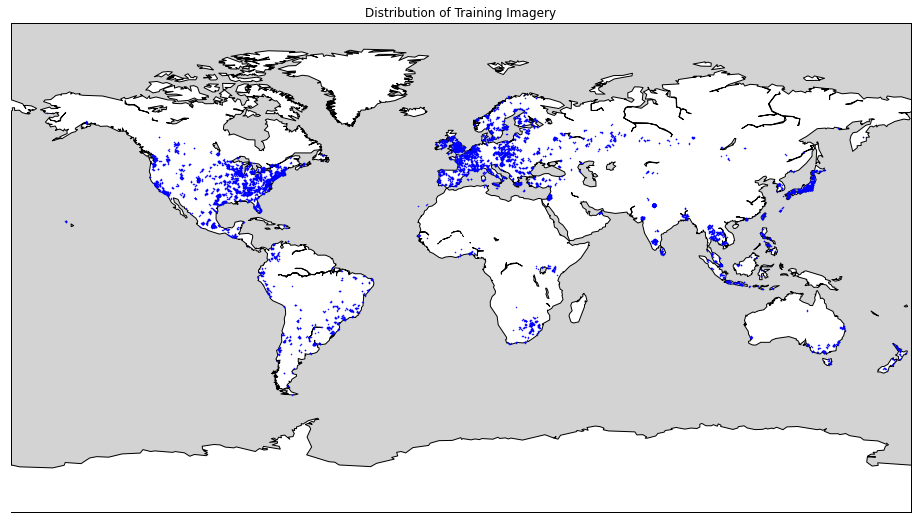

In [35]:


map = Basemap(projection='gall')

map.drawcoastlines()
map.drawmapboundary(fill_color='lightgray',zorder=0)
map.fillcontinents(color='white',lake_color='lightgray',zorder=1)

map.scatter(data_2[1],data_2[0],marker=".",color="blue",zorder=2, s = 1, latlon = True)

plt.title(r"Distribution of Training Imagery")

plt.savefig("loc_map.png",format="png",dpi=160)

plt.show()

In [11]:
## now stich panos from all of them

# working directory  : "test_dataset"
# finished directory : "test_dataset_panos"

Resolution set-up

In [12]:
#resolution of pano images:

res = (640,320) #2 : 1

#tile width has to be x_res // 4 and y_res //2

width  = res[0] // 4
height = res[1] // 2


# higher res to sample from :
multiplier = 2
width  *= multiplier
height *= multiplier

print(f"download res : {width}x{height}", "(max : 640x640)")

download res : 320x320 (max : 640x640)


In [13]:
plt.rcParams['figure.figsize'] = [4, 2]

Downloading

In [18]:

#download cube mapping of pano corresponding to panoid from API

for location in data[3500:4000]:
    
    panolat,panolng,panoid = location
    
    print(panoid)
    
    streetview.download_cube_mapping(panoid, "training_dataset_5", key,
                                     width=width, height=height, 
                                     extension='jpg', year=2022, fname=None)
    

    full_pano = streetview.equirectangular_projection(panoid,"training_dataset_5","training_dataset_5_panos",
                                                      x_res=res[0], y_res=res[1],
                                                      x_tile_res = width, y_tile_res = height )


    #plt.imshow(full_pano)
    #plt.show()

TSqXs-gH2-JAUYRRB27b9Q
4 5 0 1 2 3 
CAoSLEFGMVFpcE1vZ0Rvb0ZqcGs4S3VEZmtGdXhyRHVOTUtOZlNYWVEwSjFxNkVz
4 5 0 1 2 3 
ERN4dKOl8Pr3__Gwo9NZDA
4 5 0 1 2 3 
CAoSLEFGMVFpcE8wUnNiZjdZS1VidEljcGxwLTlwNmtWOUdhQUJ1T2lhVDc5bXR2
4 5 0 1 2 3 
CAoSLEFGMVFpcE51c0hYMnNNeGVyTDBXT1VyaGhDbU1uX2dpVVN4VVRvNXZXUWF3
4 5 0 1 2 3 
Q_emHSIz4WkfZREfTSEDkw
4 5 0 1 2 3 
WIV_W-3ssyYcxGsvwfSOeA
4 5 0 1 2 3 
SN1D0eN3OzRMklX0mPG9rQ
4 5 0 1 2 3 
xLq-nos31_zDQ_7hvt19Fw
4 5 0 1 2 3 
fy4JAGRI9UEHrPYWmEZggw
4 5 0 1 2 3 
RADeFr5wXyMBq68jYS0esA
4 5 0 1 2 3 
gSpYCaYnTzg5tbBiVdXx2A
4 5 0 1 2 3 
dQH9K6KYhqgavxqHs1bxHg
4 5 0 1 2 3 
CAoSLEFGMVFpcE15djJDOWtPdklVNHVYMkZJVXR0QWstbDRqN3h4cW5sNDFZdW11
4 5 0 1 2 3 
LHtWR0llqivtj4n5kT-HZQ
4 5 0 1 2 3 
CAoSLEFGMVFpcE5VOVpva1VTMkpJb01kUnFvaWQtNU9INWhwSXR6ZW5nRHJrdFdx
4 5 0 1 2 3 
XBqU5vU7RV6f63UGYvws_g
4 5 0 1 2 3 
9y51CFeiG915vHGIcP7l_w
4 5 0 1 2 3 
IX6uuJxI0HnXY2vazjx61g
4 5 0 1 2 3 
iU0PJMUajXJRVHp2-x1o7w
4 5 0 1 2 3 
CYA3CSTCRGVSoC2ppKpo2A
4 5 0 1 2 3 
pJRSe-fcm8yX1WeiTXavMQ
4 5 0 1 2 3

4 5 0 1 2 3 
N4m4yrij41ThRjtarJPwaA
4 5 0 1 2 3 
cqrvKPorOAxklnvvQjFC6A
4 5 0 1 2 3 
3u86JBJfrgc2pRMVt26oKA
4 5 0 1 2 3 
nBp3O9iZZKW8XJrush399Q
4 5 0 1 2 3 
EDSIGfh5mYe-xNoeM5OR1A
4 5 0 1 2 3 
xjrlPcaSBhf5hrXuF19FZQ
4 5 0 1 2 3 
CAoSLEFGMVFpcE1oOFh2SW02bWtyRjY0Mk56YWhiWWxNbGtVZWRSNG9jYUY2QXlW
4 5 0 1 2 3 
fID8kVR4R_ihCxuPRKy2UA
4 5 0 1 2 3 
WkQ-67KZE-2k7g8XNfQVaQ
4 5 0 1 2 3 
NQH2JTFOOp32-prOwAlMbg
4 5 0 1 2 3 
zuEqZnymGU022xBgTLgeeA
4 5 0 1 2 3 
CAoSLEFGMVFpcE1fTWNKd2s1VlVETkxGNUtBbGdiZDh6ejNZUlZkS1Q4OU1uRXN0
4 5 0 1 2 3 
4ZRdo-XTkVvH7CQhI_iHyg
4 5 0 1 2 3 
CAoSLEFGMVFpcE50NXFLX1AtSWhFR3A1Zy1YRDhkZENDNkNndzhnSW1TRk9FWGcw
4 5 0 1 2 3 
CAoSLEFGMVFpcFBPMHJXSmtob2tFc2FfT2ExdURBYVFaVm1UdXdEUUVTSzFDeE53
4 5 0 1 2 3 
sC748uTHsWCWc407kSxHaA
4 5 0 1 2 3 
GLgLElldMV4w1zqr137SnA
4 5 0 1 2 3 
CAoSLEFGMVFpcE5xT1dXemZHQUhwWVF3VUVrdm5IZGFLMmRyZF9GekhSbU5pSGNW
4 5 0 1 2 3 
CAoSLEFGMVFpcFB6V2FfQkRPTDlWeTg4TjU2elY0RnRoREQtLWxPR24zam9ubEI1
4 5 0 1 2 3 
CAoSLEFGMVFpcE9vTkdyQ1RaeUZqRjQ5LUJBNFR2R3hQRzAzVDJ

4 5 0 1 2 3 
fgT6vjiPKddI_ufWZ71obQ
4 5 0 1 2 3 
zSHY3TmXLJdqWHtWgv8Wog
4 5 0 1 2 3 
bl1wpbXEQx5FGDxmPvYoDw
4 5 0 1 2 3 
cBQW5b1FlwuBt4vC6zHDQg
4 5 0 1 2 3 
D69Ixw1KeWvj4mnhXAiPpw
4 5 0 1 2 3 
CAoSLEFGMVFpcE53cnFJNHVEMHd4S0Q2Q3JNMmtXajViYXJSRWF1bDVwRndNRjBz
4 5 0 1 2 3 
PAfTRrK_y76LTlg0Q4pjRg
4 5 0 1 2 3 
CAoSLEFGMVFpcFBxUldESm5nWkZ2TFJtT2oyUF9MX1hMN1pKUFQyYUV4RkxGbGxy
4 5 0 1 2 3 
Vr7COsGvcgKM-K0x4q2xcQ
4 5 0 1 2 3 
CAoSLEFGMVFpcE9aSEVzLS1oSDZHek9JeW9NQS01M1RGSmV1YmlWTS1pVmdZVmJS
4 5 0 1 2 3 
G0sd2R9QyClP6rScQ2ghUw
4 5 0 1 2 3 
tG3UrK2jktB1JhpvmBP1jA
4 5 0 1 2 3 
k5lnvqdI-1w8yHTkuOpNMw
4 5 0 1 2 3 
nAOWsTd26dLgb9qjhXXIyA
4 5 0 1 2 3 
Nhl-KbO3QyB5hoJztdjjUA
4 5 0 1 2 3 
4WQ8j5_rOSA1pUXzE73b8Q
4 5 0 1 2 3 
TzElzoGFAaiKTuKVbMq73w
4 5 0 1 2 3 
dIH9y8a-kjCpSQESQ1_vIA
4 5 0 1 2 3 
2myA5GyuALiUO6VNxDqJkQ
4 5 0 1 2 3 
CAoSLEFGMVFpcE5UWGM4ZGRvUGQ5RW56dlpTTXM4SUNocHkwYThGOWdMMnhCbldW
4 5 0 1 2 3 
R58U_STT1seC_uIZWOgvbQ
4 5 0 1 2 3 
KxUbx8vSYOwcsyZ1adjtmw
4 5 0 1 2 3 
0dAaMzbnQ7Pp_r4cd3JnEw
4 5 